# Tankmodell - Vi tømmer tanken (fri utstrømming)
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

<hr/>

<img alt="Opphavsmann: Life-Of-Pix Lisens: Creative Commons CC0" title="Opphavsmann: Life-Of-Pix Lisens: Creative Commons CC0" style="width: 200px; float: right; margin-left: 30px;" src="img/tanks-406908_640.jpg">

__Tidligere har vi sett på hvordan vi kan modellere hvordan en tank tømmes for væske dersom utstrømmen fra tanken er konstant. Det forutsetter at vi kan styre utstrømmen. Hva skjer dersom væsken kan strømme fritt ut fra tanken?__

> Denne siden dekker helt eller delvis kompetansemålene: <br>
> [Grunnleggende programmering 2, 3 og 4](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#grunnleggende-programmering) <br>
> [Matematiske metoder 1, 4 og 5](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#matematiske-metoder) <br>
> [Modellering 1](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#modellering)


Vi har en tank med samme tverrsnitt $A_t=2 \ \mathrm{m}^2$ over hele høyden til tanken. I bunnen av tanken er det et hull hvor innholdet i tanken renner ut. Arealet til dette hullet er $A_h=0,002 \ \mathrm{m}^2$. Ved tiden $t=0 \ \mathrm{s}$ er tanken fylt opp til høyden $h=4 \ \mathrm{m}$. Hvordan vil høyden $h$ endres over tid? Når er tanken tom? Vi antar at væsken er inkompresibel og at den strømmer friksjonsfritt ut av hullet i bunnen. Vi kan også sette $g=9.81 \ \mathrm{m/s}^2$.

![Skisse av tanken](img/tank01.png)

La oss først definere de parametrene vi har fått oppgitt:

In [43]:
import math # vi trenger dette biblioteket senere

A_t = 2.00  # Tankens tverrsnittareal (m^2)
A_h = 0.002 # Hullets tverrsnittareal (m^2)
h = 4.00    # Vannivået når forsøket starter (m)
g = 9.81    # Gravitasjonskonstanten (m/s^2)

Volumet av væsken i tanken kan skrives som:

$$ V = A_t \cdot h $$

Vi kan nå regne ut volumet $V_{0}$ av væsken i tanken ved tiden $t=0 \ \mathrm{s}$ på følgende måte i Python:

In [44]:
V0 = A_t * h
print("Volumet ved tiden t = 0 s er {} m^3".format(V0))

Volumet ved tiden t = 0 s er 8.0 m^3


Så setter vi opp et uttrykk for hvordan volumet endrer seg over tid, når det bare strømmer væske ut av tanken og det ikke kommer noe væske inn i tanken. Da har vi at:

$$ \frac{dV}{dt} = -q_{ut}$$

Eller for å si det med ord: 
> Endringen til volumet av væsken i tanken er lik mengden væske som strømmer ut av tanken i det samme tidsrommet.

Det vil si at dersom det strømmer ut 100 liter væske i løpet av ett sekund, så må volumet av væsken i tanken også ha minket med 100 liter i løpet av det samme sekundet.

Mengden $q_{ut}$ som strømmer ut av tanken er gitt ved arealet $A_h$ til hullet og hastigheten $v_1$ på væskestrømmen ut av hullet: 

$$ q_{ut} = A_h \cdot v_1 $$

Siden tverrsnittet $A_t$ til tanken er konstant og volumet av væsken i tanken er gitt ved $V=A_t \cdot h$, kan vi nå skrive:

$$ A_t \frac{dh}{dt} = -A_h \cdot v_1 $$


<img alt="Figur av vanntank med beregninger for to ulike punkter i tanken" style="width: 200px; float: right; margin-left: 30px;" src="img/tank04.png">

Fra fysikken kjenner vi [Bernoullis ligning](http://hyperphysics.phy-astr.gsu.edu/hbase/pber.html) som kan brukes til å beskrive hvordan vannet vil renne ut av tanken. Trykkforskjellen mellom innsiden og utsiden av hullet i bunnen av tanken er den drivende kraften som gjør at væsken vil strømme ut gjennom hullet. Væsken vil strømme fra der hvor det er høyt trykk til der hvor det er lavt trykk. Vi velger oss et punkt 0 på vannoverflaten og et punkt 1 ved utløpet i bunnen av tanken. Da kan vi sette opp Bernoulli's ligning slik:

$$ P_0 + \rho g h_0 + \frac{1}{2}\rho v_0^2= P_1 + \rho g h_1 + \frac{1}{2}\rho v_1^2$$

Der $P$ er trykk og $\rho$ er massetettheten til væsken. Vi har atmosfæretrykk både over tanken og ved utløpet, så da er $P_0 = P_1 = P_{atm}$. Siden trykket $P$ er likt på begge sider av ligningen, kansellerer disse hverandre. 

Når vi bruker Bernoullis ligning har vi gjort en rekke __antakelser og forenklinger__. Væsken må være inkompressibel og den må strømme friksjonsfritt. I tillegg må tverrsnittet i tanken være mye større enn tverrsnittet av hullet hvor væsken strømmer ut. Da kan vi anta at $v_0\approx0 \ \mathrm{m/s}$. 

Vi definerer at høyden er null ved tankens bunn, og vi får $h_1=0\ \mathrm{m}$. Høydeforskjellen $h_0 - h_1 = h_0 - 0 = h$ er den til enhver tid gjeldende væskehøyden. Vi kan nå løse ligningen med hensyn på $v_1$, og får:

$$ v_1 = \sqrt{2gh} $$

Vi har til nå antatt at væsken strømmer friksjonsfritt gjennom hullet i bunnen av tanken. Det er mulig å sette inn en korreksjonsfaktor $C$ for å korrigere for feilen vi får av denne antakelsen:

$$ v_1 = C \cdot \sqrt{2gh} $$

Siden vi ikke vet hvor stor denne faktoren skal være, setter vi den bare til 1 i beregningene nedenfor. Vi slår sammen $C$ og $\sqrt{2g}$ til konstanten $k$.

$$ k = C \cdot \sqrt{2g} $$


In [45]:
C = 1
k = C * math.sqrt(2*g)
print("Konstanten k er {}".format(k))

Konstanten k er 4.4294469180700204


Farten $v_1$ er nå gitt ved:

$$ v_1 = k \cdot \sqrt{h} $$

Nå kan vi sette inn uttrykket for $v$ i uttrykket for endring av volumet til væsken i tanken:

$$ A_t \frac{dh}{dt} = - A_h k \sqrt{h}$$

Uttrykket for endring av høyden over tid blir da:

$$ \frac{dh}{dt} = - \frac{A_h}{A_t} k \sqrt{h}  $$

Vi bruker Eulers metode for å finne ut hva høyden $h$ er når vi endrer tiden med $\Delta t = t_{i+1} - t_i$:

$$ \frac{h_{i+1} - h_i}{\Delta t} = - \frac{A_h}{A_t}  k\sqrt{h_i} $$

$$ h_{i+1} = h_i - \frac{A_h}{A_t}  k\sqrt{h_i} \cdot \Delta t $$

Nå kan vi implementere Eulers metode i Python:

In [46]:
def euler(h, dt):
    '''Regner ut ny høyde i tanken vet tiden t_neste, gitt høyden ved tiden t. 
       Bruker globale variabler for areal av tank og hull i bunn av tanken.
    '''
    return h - (A_h/A_t) * k * math.sqrt(h) * dt

Vi starter ved tiden $t=0$ og endrer tiden med 5 sekunder for hver nye beregning ($\Delta t=5$).

t = 0 => h = 4.0 	 v = 8.86 	 qut = 0.0177
t = 10 => h = 3.91 	 v = 8.76 	 qut = 0.0175
t = 20 => h = 3.82 	 v = 8.66 	 qut = 0.0173
t = 30 => h = 3.74 	 v = 8.56 	 qut = 0.0171
t = 40 => h = 3.65 	 v = 8.46 	 qut = 0.0169
t = 50 => h = 3.57 	 v = 8.37 	 qut = 0.0167
t = 60 => h = 3.48 	 v = 8.27 	 qut = 0.0165
t = 70 => h = 3.4 	 v = 8.17 	 qut = 0.0163
t = 80 => h = 3.32 	 v = 8.07 	 qut = 0.0161
t = 90 => h = 3.24 	 v = 7.97 	 qut = 0.0159
t = 100 => h = 3.16 	 v = 7.87 	 qut = 0.0157
t = 110 => h = 3.08 	 v = 7.77 	 qut = 0.0155
t = 120 => h = 3.0 	 v = 7.67 	 qut = 0.0153
t = 130 => h = 2.93 	 v = 7.58 	 qut = 0.0152
t = 140 => h = 2.85 	 v = 7.48 	 qut = 0.015
t = 150 => h = 2.77 	 v = 7.38 	 qut = 0.0148
t = 160 => h = 2.7 	 v = 7.28 	 qut = 0.0146
t = 170 => h = 2.63 	 v = 7.18 	 qut = 0.0144
t = 180 => h = 2.56 	 v = 7.08 	 qut = 0.0142
t = 190 => h = 2.49 	 v = 6.98 	 qut = 0.014
t = 200 => h = 2.42 	 v = 6.88 	 qut = 0.0138
t = 210 => h = 2.35 	 v = 6.79 	 qut = 0.0136
t = 2

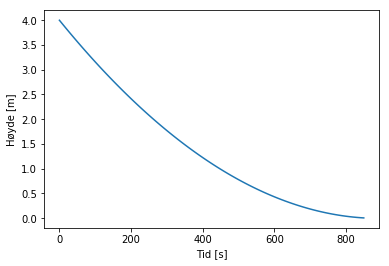

In [47]:
t = 0   # starttiden
dt = 10 # tidssteg i sekunder
h_lim = 0.01 # vi stopper beregningen når høyden er mindre enn denne
t_hist = [] # Lagerplass for historiske tidspunkter
h_hist = [] # Lagerplass for historiske h-verdier
while h > h_lim:
    if t > 0: # ingen beregning ved t = 0, der bruker vi initialverdier
        h = euler(h, dt)
    v = k * math.sqrt(h) # Hastigheten til væsken som strømmer ut av hullet
    q_ut = A_h * v # Mengden væske som strømmer ut av hullet
    print("t = {} => h = {} \t v = {} \t qut = {}".format(t, round(h,2), round(v,2), round(q_ut,4)))
    t_hist.append(t)
    h_hist.append(h)
    t = t + dt # tidspunkt ved neste tidssteg

import matplotlib.pyplot as plt
plt.plot(t_hist, h_hist)
plt.ylabel('Høyde [m]')
plt.xlabel('Tid [s]')
plt.show()

# Oppgaver
1. Forsøk å endre på arealet av hullet i bunnen av tanken. Hvordan påvirker det simuleringen?
2. Endre tidsstegene i simuleringen, for eksempel til 1 sekund eller til 60 sekunder. Hva er fordelene og ulempene med å bruke korte og lange tidssteg?
3. Forsøk med ulike korreksjonsfaktorer $C$. [En passende faktor for vann kan være 0,61](https://www.usbr.gov/tsc/techreferences/mands/wmm/chap09_05.html). Hvor mye har denne korreksjonen å si for simuleringen?